# Visualization of K-Means applied on raw pixels

In [142]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [143]:
from src.hierarchical_properties.k_means import k_means_img_patch
from src.data_generation.utils import downsample_img

In [144]:
# Constants
img_path = r"../../data/img_trial/abc.png"

full_size = 448
patch_size = 14

# K-Means
k = 6
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True
bilinear_interpolation_flag = cv.INTER_LINEAR
nn_interpolation_flag = cv.INTER_NEAREST

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [145]:
img = cv.imread(img_path)
img = downsample_img(img, full_size, full_size, False)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [146]:
final_img_bilinear_interp, final_img_nn_interp = \
    k_means_img_patch(img, patch_size, k, max_iter, epsilon,
                      attempts, normalize,
                      weight_original_img=0.4,
                      weight_colored_patch=0.4, gamma=0,
                      compute_also_nn_interpolation=True)

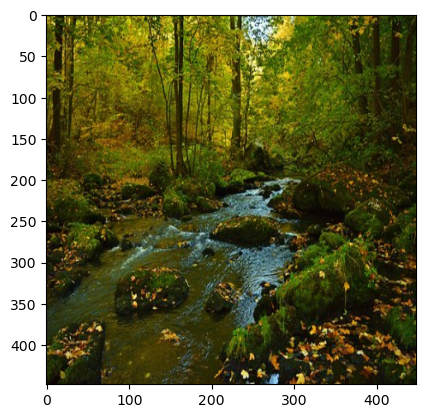

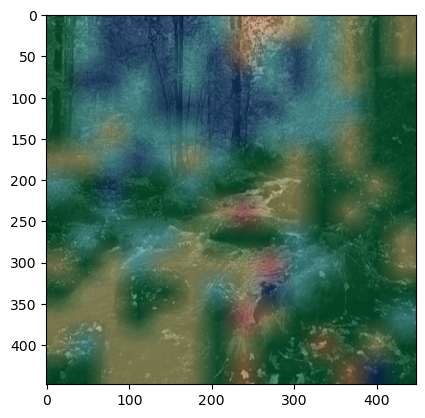

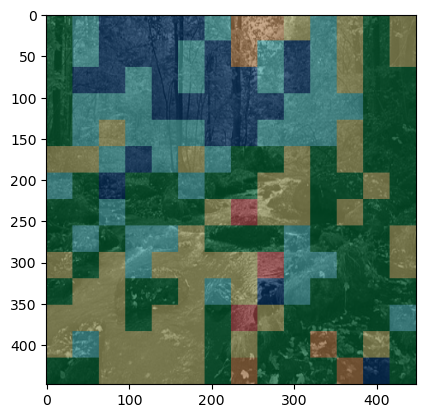

In [147]:
plt.imshow(img)
plt.show()
plt.imshow(final_img_bilinear_interp)
plt.show()
plt.imshow(final_img_nn_interp)
plt.show()

# Visualization of K-Means applied on raw pixels (step by step)

In [148]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

## Extraction of the patch from the original image

In [149]:
patch = downsample_img(img, patch_size, patch_size, False)

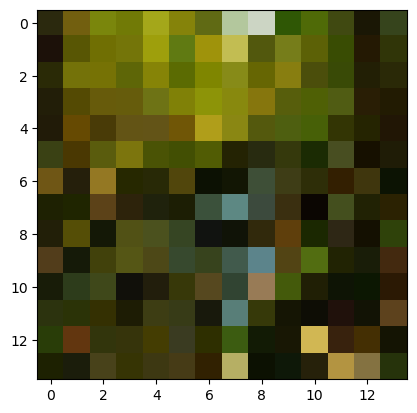

In [150]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

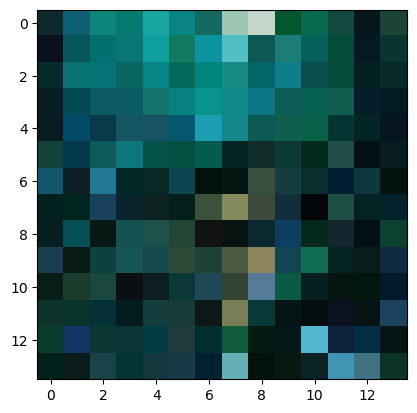

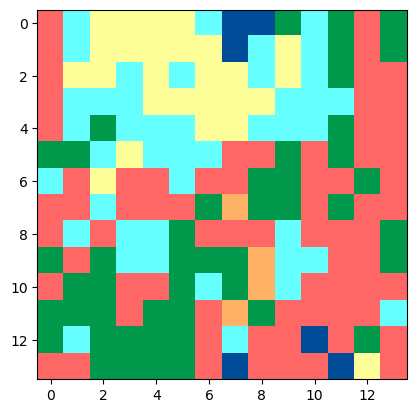

In [151]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Bilinear Interpolation

In [152]:
seg_full = downsample_img(seg_patch, full_size, full_size, False, interpolation_method=bilinear_interpolation_flag)

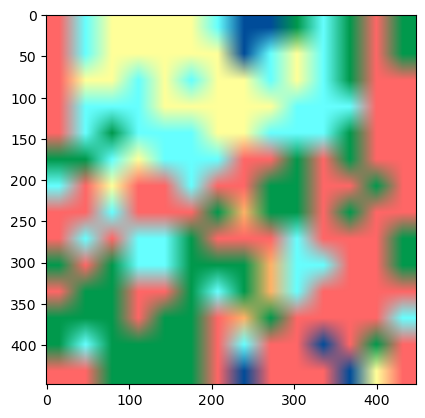

In [153]:
plt.imshow(seg_full)
plt.show()

In [154]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [155]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

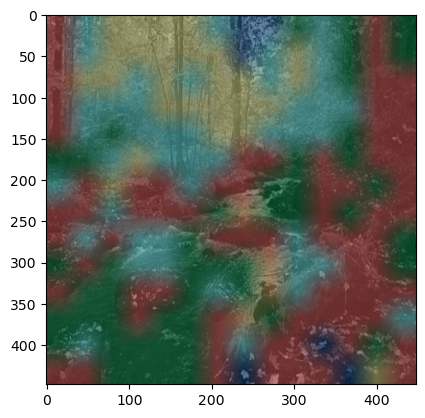

In [156]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [157]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=nn_interpolation_flag)

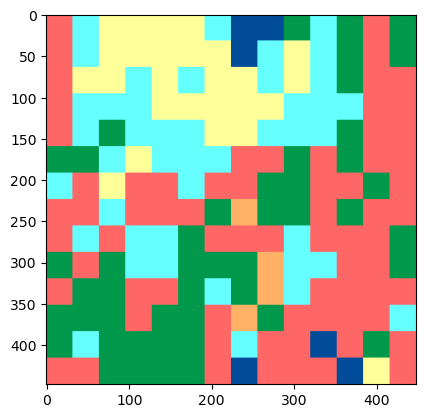

In [158]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [159]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

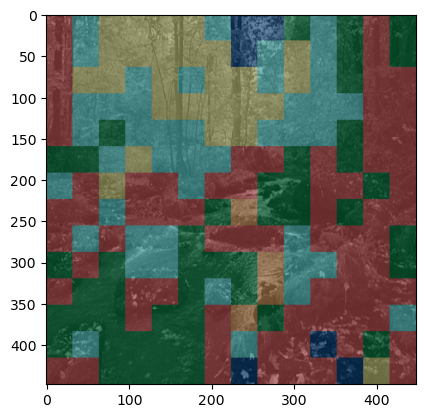

In [160]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()